In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde as kde
# from scipy.stats import norm, uniform, multivariate_normal as multinorm, norm
from scipy.stats.mstats import mquantiles
# from tqdm import tqdm
import seaborn as sns
%load_ext autoreload
%autoreload 2
%matplotlib inline
np.set_printoptions(edgeitems=10, linewidth=120, suppress=True, precision=8)
plt.style.use('dean_style.conf')
from pertussis import *
logger.setLevel(logging.INFO)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load Simulation

In [64]:
# simulation = load_mcmc('./simulations/rho-60-36k.pkl')
# simulation = load_mcmc('./simulations/1121-rho-70-36k.pkl')
# simulation = load_mcmc('./simulations/1121-rho-70-with-dynamic.pkl')
# simulation = load_mcmc('./simulations/1128-rho-50-new.pkl')
# simulation = load_mcmc('./simulations/1315-extra-for-ppt.pkl')
simulation = load_mcmc('./simulations/1418-imoh-one-vaccine_b.pkl')
mcmc = simulation['mcmc']
create_pairwise(simulation)
policies = simulation['policies']
default = policies[0]
metric_names = ['sick','hospital','vaccines']
age_names = ['0-1','1-21','21+']
cover = np.array(simulation['pregnant_coverage'])
print (len(simulation['policies']))
print (len(simulation['p']))

11
500


In [45]:
[policy['name'] for policy in policies]

['default',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '13',
 '05,06',
 '05,08',
 '06,08']

# Charts

## Pregnant Coverage

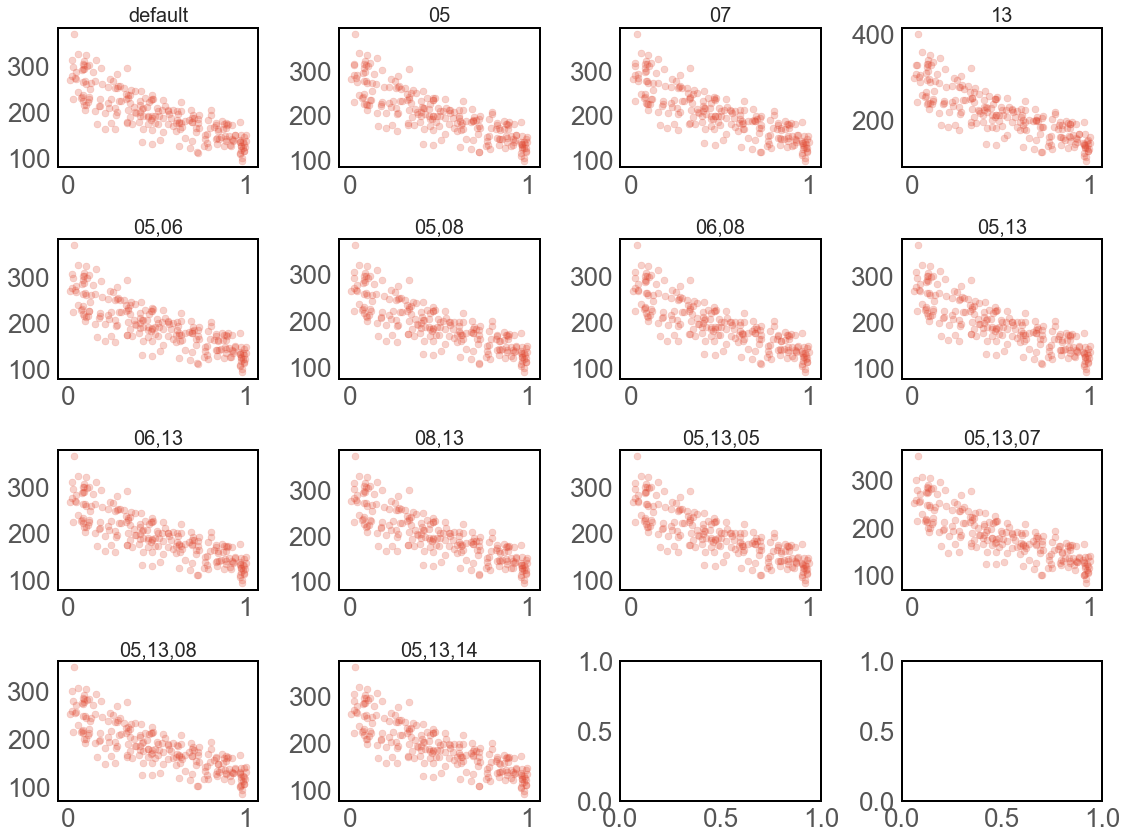

In [19]:
cols = 4
rows = int(np.ceil(len(simulation['policies'])/cols))
fig, axs = plt.subplots(rows,cols, figsize=(cols*4,rows*3))
axs = np.concatenate(axs)
sick_kids = np.array(policies[0]['sick'])[:,0]
for i in range(simulation['n_policies']):
    policy = policies[i]
    ax = axs[i]
    ax.set_title(policy['name'])
    ax.scatter(cover, np.array(policy['sick'])[:,0]/12, alpha=0.251)
plt.tight_layout()
plt.show()

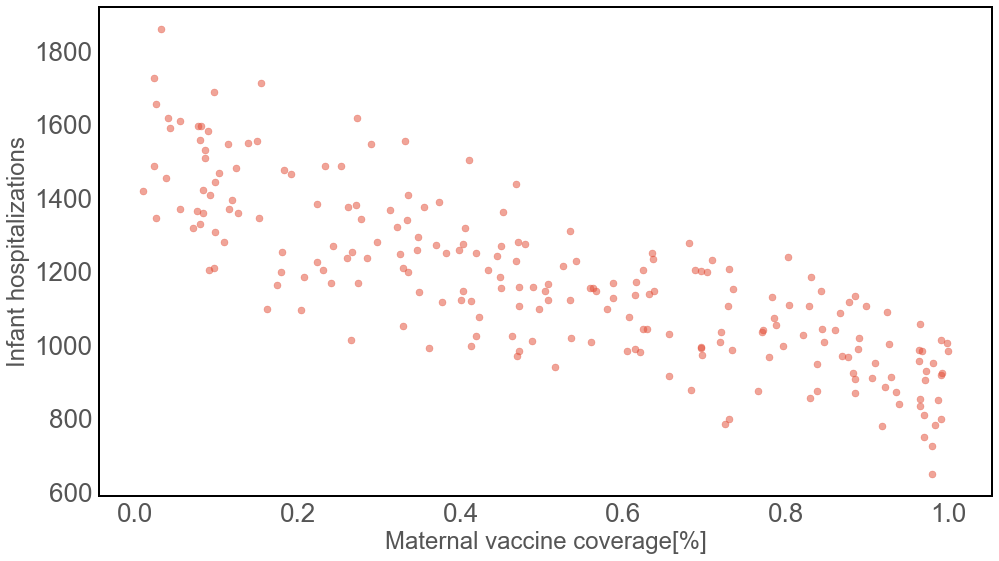

In [20]:
fig, ax = plt.subplots(1,figsize=(16,9))
labels = ['Current program', 'Only maternal vaccine']
for i,n in enumerate([0]):
    policy = policies[n]
    ax.scatter(cover, np.array(policy['hospital']).sum(axis=1), alpha=0.501, label=policy['name'])
#     ax[1].scatter(cover, np.array(policy['sick']).sum(axis=1), alpha=0.501, label='c')
# ax.set_title("Infant Cases")
ax.set_xlabel("Maternal vaccine coverage[%]", fontsize=24)
ax.set_ylabel("Infant hospitalizations", fontsize=24)
# ax.set_ylabel("Infant cases", fontsize=24)
# ax[0].legend(fontsize=16)
# ax[1].legend(fontsize=16)
plt.show()

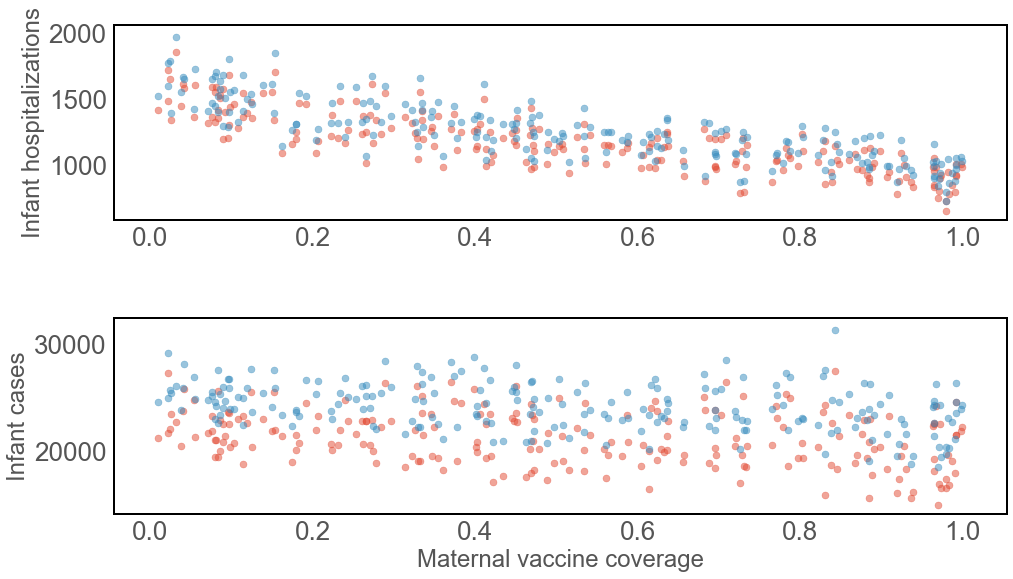

In [22]:
fig, ax = plt.subplots(2,figsize=(16,9))
labels = ['Current program', 'Only maternal vaccine']
for i,n in enumerate([0,1]):
    policy = policies[n]
    ax[0].scatter(cover, np.array(policy['hospital']).sum(axis=1), alpha=0.501, label='h')
    ax[1].scatter(cover, np.array(policy['sick']).sum(axis=1), alpha=0.501, label='c')
# ax.set_title("Infant Cases")
ax[1].set_xlabel("Maternal vaccine coverage", fontsize=24)
ax[0].set_ylabel("Infant hospitalizations", fontsize=24)
ax[1].set_ylabel("Infant cases", fontsize=24)
# ax[0].legend(fontsize=16)
# ax[1].legend(fontsize=16)
plt.show()

### CHART

In [20]:
p

array([[ 0.01 ],
       [ 0.015],
       [ 0.015]])

In [12]:
from scipy.stats import linregress
m1,n1,r1,p1,err1 = linregress(cover, np.array(policy['hospital'])[:,0])
m2,n2,r2,p2,err2 = linregress(cover, np.array(policy['sick'])[:,0])
xs = np.linspace(0,1,100)

C:\Program Files\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\Program Files\Anaconda3\lib\site-packages\numpy\core\_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


92.87342574912101 - 42.608402122112274 = 50.26502362700874: reduction 0.4587792662802205
277.58524508168017 - 126.33361654369496 = 151.2516285379852: reduction 0.455116468840125


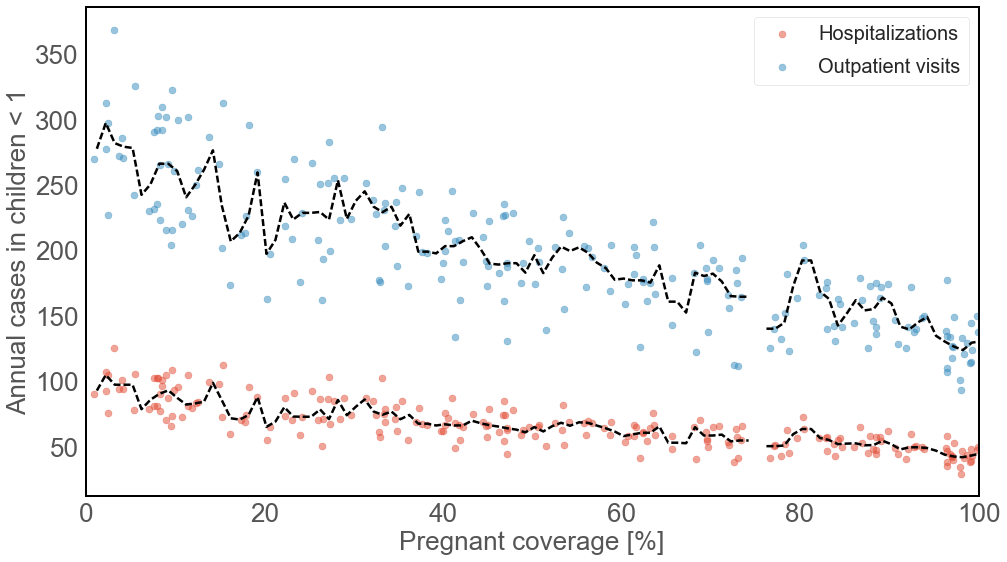

In [23]:
from scipy.stats import linregress
plt.style.use('dean_style.conf')
fig, ax = plt.subplots(figsize=(16,9))
xs = np.linspace(0,1,100)
for n in [0]:
    policy = policies[n]
    age = 0
    ax.scatter(cover, np.array(policy['hospital'])[:,age]/12, alpha=0.501, label='Hospitalizations')
    ax.plot(*spline(cover, np.array(policy['hospital'])[:,age]/12,0.025),color='k',ls='--')
    ax.scatter(cover, np.array(policy['sick'])[:,age]/12, alpha=0.501, label='Outpatient visits')
    ax.plot(*spline(cover, np.array(policy['sick'])[:,age]/12,0.025),color='k',ls='--')
# l.set_label("AS")
# ax.set_title("Cases")
# ticks = ax.get_xticklabels() * 100
ax.set_xticklabels(np.arange(0,101,20))
ax.set_xlim(0,1)
ax.set_xlabel("Pregnant coverage [%]")
ax.set_ylabel("Annual cases in children < 1")
leg = ax.legend(fontsize=20)

plt.show()

### Reduction

In [11]:
policy = policies[0]
policy['name']

'default'

#### <1

In [12]:
arrx, arry= cover, np.array(policy['sick'])[:,0]/12
large = np.median(arry[(arrx >= 0.48) & (arrx <= 0.52)])
small = np.median(arry[(arrx >= 0.73) & (arrx <= 0.77)])
print ("{} - {} = {}: reduction {}".format(large,small,large-small, 1 - small/large))

C:\Program Files\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\Program Files\Anaconda3\lib\site-packages\numpy\core\_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan - nan = nan: reduction nan


In [13]:
arrx, arry= cover, np.array(policy['hospital'])[:,0]/12
large = np.median(arry[(arrx >= 0.48) & (arrx <= 0.52)])
small = np.median(arry[(arrx >= 0.73) & (arrx <= 0.77)])
print ("{} - {} = {}: reduction {}".format(large,small,large-small, 1-  small/large))

C:\Program Files\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\Program Files\Anaconda3\lib\site-packages\numpy\core\_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan - nan = nan: reduction nan


#### Population

In [8]:
np.array(policy['sick']).sum(axis=1)

array([ 20548.8297,  17171.4826,  23232.7809,  20858.9036,  21814.2659,
        24964.5172,  22386.3629,  21496.412 ,  16672.3198,  24540.346 , ...,
        24333.7953,  19504.3771,  18741.8973,  18264.062 ,  20854.4965,
        20229.2948,  19981.9961,  23722.2211,  18230.9812,  22455.9499])

In [9]:
large = small = 0
for i in [0,1,2]:
    arrx, arry= cover, np.array(policy['sick'])[:,i]/12
    large += np.median(arry[(arrx >= 0.48) & (arrx <= 0.52)])
    small += np.median(arry[(arrx >= 0.73) & (arrx <= 0.77)])
print ("{} - {} = {}: reduction {}".format(large,small,large-small, 1 - small/large))

1679.739748473915 - 1620.5100046353518 = 59.22974383856308: reduction 0.035261262283264316


In [10]:
large = small = 0
for i in [0,1,2]:
    arrx, arry= cover, np.array(policy['hospital'])[:,i]/12
    large += np.median(arry[(arrx >= 0.48) & (arrx <= 0.52)])
    small += np.median(arry[(arrx >= 0.73) & (arrx <= 0.77)])
print ("{} - {} = {}: reduction {}".format(large,small,large-small, 1 - small/large))

91.02187872032289 - 80.0121285822238 = 11.009750138099093: reduction 0.1209571840626148


## Comparison

In [80]:
print(compare_policies[0]['name'])
base = np.array(compare_policies[0]['hospital'])[:,0]

default


In [95]:
metric_names

['sick', 'hospital', 'vaccines']

In [189]:
metric_diffs = ["{}_diff".format(m) for m in metric_names]
metric_pct = ["{}_pct".format(m) for m in metric_names]
compare_policies = policies#[:] + policies[:1]
policy_names = [policy['name'] for policy in compare_policies]
# bp = [np.array([ix[metric].sum(axis=1) for ix in compare_policies]).T for metric in metric_diffs]
# bp += [np.array([ix['ratio_diff'] for ix in compare_policies]).T]

basec_1y = np.array(compare_policies[0]['sick'])[:,0]
baseh_1y = np.array(compare_policies[0]['hospital'])[:,0]
basec = np.array(compare_policies[0]['sick']).sum(axis=1)
baseh = np.array(compare_policies[0]['hospital']).sum(axis=1)

bp1y = [np.array([ix[metric][:,0] for ix in compare_policies]).T for metric in metric_diffs]
# bp = [np.array([ix[metric] for ix in compare_policies]).T for metric in metric_pct]
bp = [np.array([ix[metric].sum(axis=1) for ix in compare_policies]).T for metric in metric_diffs]

# DataFrame
df_sick = pd.DataFrame(data=bp[0], columns=policy_names)
df_hospital = pd.DataFrame(data=bp[1], columns=policy_names)
# df_ratio = pd.DataFrame(data=bp[3], columns=policy_names)
df_sick_1y = pd.DataFrame(data=bp1y[0], columns=policy_names)
df_hospital_1y = pd.DataFrame(data=bp1y[1], columns=policy_names)

df_sick_1y = df_sick_1y.div(basec_1y,axis=0) * 100
df_hospital_1y = df_hospital_1y.div(baseh_1y,axis=0) * 100
df_sick = df_sick.div(basec,axis=0) * 100
df_hospital = df_hospital.div(baseh,axis=0) * 100


remove_cols = [col for col in df_hospital.columns if col.count(',')==0]
shift_cols = [col for col in df_hospital.columns if col.count(',')==1]
add_cols = [col for col in df_hospital.columns if col.count(',')==2]
dynamic_cols = [col for col in df_hospital.columns if "DYNAMIC" in col]
control_cols = [col for col in df_hospital.columns if "CONTROL" in col]
fontdict={'fontsize':12}
colors = {p['name']:'C{}'.format(p['name'].count(',')) for p in policies}

In [190]:
df_sick

,default,03,04,05,06,07,08,13,"05,06","05,08","06,08"
0,0.0,-23.149964,-19.019615,-14.931573,-13.589590,-13.421829,-14.612482,-17.893194,-8.704966,-2.829150,-4.380409
1,0.0,-24.562549,-20.301564,-15.885562,-14.172838,-13.526136,-14.423064,-18.161336,-9.705143,-3.665049,-4.934938
2,0.0,-14.804590,-11.770575,-8.951512,-8.932985,-9.723939,-11.036640,-12.532174,-4.045767,-0.351366,-2.119666
3,0.0,-25.773940,-21.390071,-16.959515,-15.263637,-14.843447,-15.942639,-19.567194,-10.160540,-3.369040,-4.985680
4,0.0,-17.081884,-13.731031,-10.555766,-10.232906,-10.865062,-12.197066,-14.100140,-5.146438,-0.802616,-2.603864
5,0.0,-24.212565,-19.762617,-15.541526,-14.346488,-14.273542,-15.547066,-18.941487,-9.166569,-3.060098,-4.823815
6,0.0,-30.641406,-25.587594,-20.227150,-17.833353,-16.932047,-17.907697,-22.638780,-12.424982,-4.285297,-5.885406
7,0.0,-24.123293,-19.913778,-15.808290,-14.433952,-14.151593,-15.255174,-18.326505,-9.556933,-3.433663,-5.021236
8,0.0,-25.581509,-21.238266,-16.873152,-15.205431,-14.761624,-15.834782,-19.332577,-10.218115,-3.484458,-5.065165
9,0.0,-22.352597,-18.392251,-14.404716,-13.155640,-12.989290,-14.140182,-17.081092,-8.405170,-2.829282,-4.315650


### Nums

In [66]:
for strat in ['05','07','13']:
    print (strat+'\n'+'-'*10)
    print ('sick')
    df = pd.DataFrame(np.array([np.array(ix['sick_diff']).sum(axis=1) for ix in compare_policies]).T, columns=policy_names)
    qs = 0.025, 0.5, 0.975
    np.median(df[strat] / 12)
    print (mquantiles(df[strat] / 12, qs))
    print (mquantiles(df_sick[strat], qs))
    
    print ('hospital')
    df = pd.DataFrame(np.array([np.array(ix['hospital_diff']).sum(axis=1) for ix in compare_policies]).T, columns=policy_names)
    qs = 0.025, 0.5, 0.975
    np.median(df[strat] / 12)
    mquantiles(df[strat] / 12, qs)
    print (mquantiles(df[strat] / 12, qs))
    print (mquantiles(df_hospital[strat], qs))
    print()

05
----------
sick
[-322.45241857 -266.97493906 -154.16753515]
[-21.43772623 -15.41695337  -7.44030335]
hospital
[-11.03004443  -7.78820616  -3.52437789]
[-11.42523207  -7.80609595  -3.7211667 ]

07
----------
sick
[-269.27352286 -237.46618002 -171.29648948]
[-18.05393973 -13.71133962  -8.38385539]
hospital
[-9.71934647 -7.46082269 -4.57569069]
[-10.19576873  -7.43983628  -4.77778326]

13
----------
sick
[-365.4736586  -314.31708608 -215.74969409]
[-24.19384161 -18.12557052 -10.58662563]
hospital
[-17.30937971 -12.82741036  -7.30947593]
[-17.34812634 -13.09700678  -8.17658024]



### Cases

In [164]:
# cols = []
# cols += remove_cols
# cols += shift_cols
# cols += add_cols
# # cols += dynamic_cols
# cols += control_cols
# fig, axs = plt.subplots(1,2, figsize=(20,25))
# policy_comparison(df_sick_1y[cover>.25][cols]/12, colors, ax=axs[0])
# axs[0].set_title("Cases difference per year over 12 years for infnats")
# # policy_comparison(df_sick_1y[cover>.25][cols]/12, colors, ax=axs[1])
# # axs[1].set_title("Infant Cases difference per year over 12 years")
# plt.rcParams['ytick.labelsize'] = 30

# policy_comparison(df_hospital_1y[cover>.25][cols]/12, colors, ax=axs[1])
# axs[1].set_title("Hospitalized cases difference per year over 12 years")
# # policy_comparison(df_hospital_1y[cover>.25][cols]/12, colors, ax=axs[1])
# # axs[1].set_title("Hospitalized infants difference per year over 12 years")
# plt.show()
# plt.show()

### Hospitalizations

In [62]:
# cols = []
# cols += remove_cols
# cols += shift_cols
# cols += add_cols
# # cols += dynamic_cols
# # cols += control_cols
# fig, axs = plt.subplots(1,1, figsize=(20,25))
# policy_comparison(df_hospital_1y[cover>.25][cols]/12, colors, ax=axs)
# axs.set_title("Hospitalized cases difference per year over 12 years")
# # policy_comparison(df_hospital_1y[cover>.25][cols]/12, colors, ax=axs[1])
# # axs[1].set_title("Hospitalized infants difference per year over 12 years")
# try:
#     policy_comparison(df_hospital_1y[cover<.20][cols]/12, colors, ax=axs[2])
#     axs[2].set_title("Hospitalized infants difference per year over 12 years")
# except: pass
# plt.show()

## PAPER

### 3. Shift

C:\Program Files\Anaconda3\lib\site-packages\seaborn\categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


Text(0,0,'')


(-16.687057892841896, 4.828501402964287)

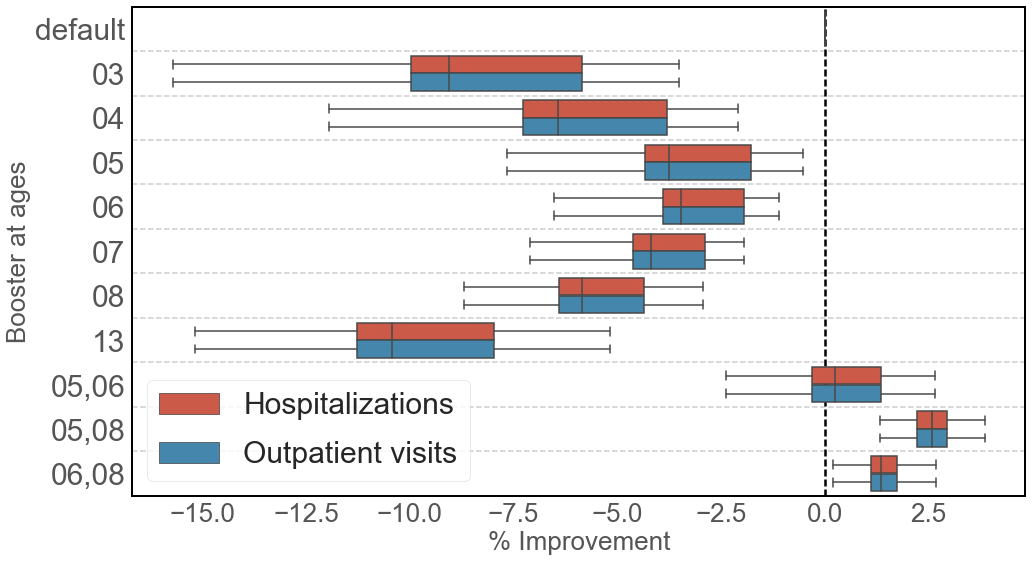

In [161]:
chosen_cols = remove_cols + shift_cols
# chosen_cols = ['06,13', '05,07','04,06']#,'default']#,'h']
dfa = pd.melt(df_sick_1y[cover>0.0], value_vars = chosen_cols, var_name="Policy")
dfb = pd.melt(df_hospital_1y[cover>0.0], value_vars = chosen_cols, var_name="Policy")
dfa['h'] = 'Outpatient visits'
dfb['h'] = 'Hospitalizations'

fig, ax = plt.subplots(figsize=(16,9))
# sns.boxplot(data = pd.concat((dfb,dfa)), hue='h', y='Policy', x='value', orient='h', ax=ax, whis=1)
sns.boxplot(data = pd.concat((dfb,dfa)), hue='h', y='Policy', x='value', orient='h', ax=ax, whis=1.5,showfliers=False, linewidth=1.5)
leg = ax.get_legend()
leg.set_title('')
print(leg.get_title())
ax.set_ylabel("Booster at ages")
ax.set_xlabel("% Improvement")
ax.vlines(0,*ax.get_ylim(),linestyles='--',zorder=0)
lims = ax.get_xlim()
ax.hlines(np.arange(len(chosen_cols)) + .5,*lims,linestyles='--',zorder=0,lw=0.3)
ax.set_xlim(*lims)
# plt.boxplot()

C:\Program Files\Anaconda3\lib\site-packages\seaborn\categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


Text(0,0,'')


(-7.4509313191917048, 0.35480625329484311)

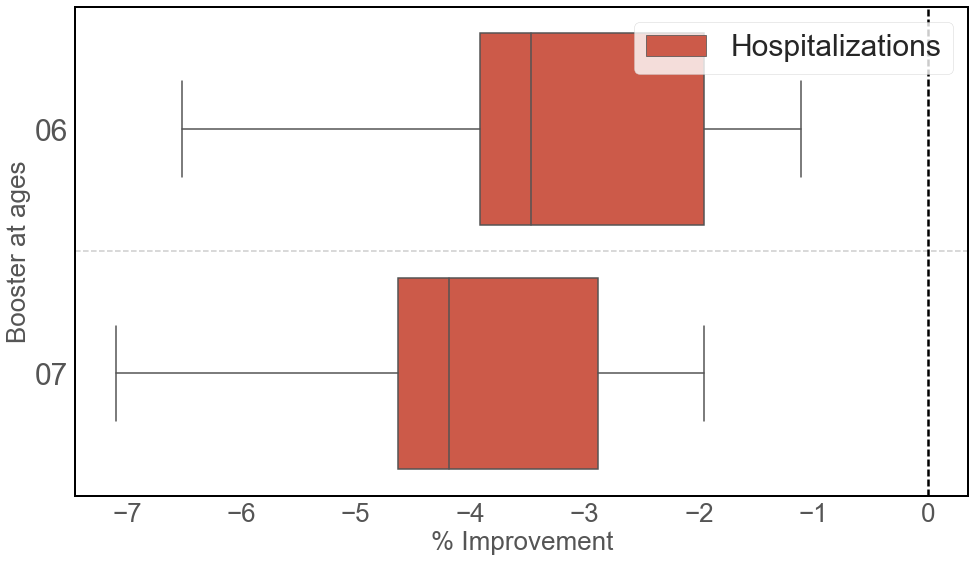

In [168]:
chosen_cols = remove_cols + shift_cols
chosen_cols = ['06','07']
dfa = pd.melt(df_sick_1y[cover>0.0], value_vars = chosen_cols, var_name="Policy")
dfb = pd.melt(df_hospital_1y[cover>0.0], value_vars = chosen_cols, var_name="Policy")
dfa['h'] = 'Outpatient visits'
dfb['h'] = 'Hospitalizations'

fig, ax = plt.subplots(figsize=(16,9))
# sns.boxplot(data = pd.concat((dfb,dfa)), hue='h', y='Policy', x='value', orient='h', ax=ax, whis=1)
# sns.boxplot(data = pd.concat((dfb,dfa)), hue='h', y='Policy', x='value', orient='h', ax=ax, whis=1.5,showfliers=False, linewidth=1.5)
sns.boxplot(data = dfb, hue='h', y='Policy', x='value', orient='h', ax=ax, whis=1.5,showfliers=False, linewidth=1.5)
leg = ax.get_legend()
leg.set_title('')
print(leg.get_title())
ax.set_ylabel("Booster at ages")
ax.set_xlabel("% Improvement")
ax.vlines(0,*ax.get_ylim(),linestyles='--',zorder=0)
lims = ax.get_xlim()
ax.hlines(np.arange(len(chosen_cols)) + .5,*lims,linestyles='--',zorder=0,lw=0.3)
ax.set_xlim(*lims)
# plt.boxplot()

C:\Program Files\Anaconda3\lib\site-packages\seaborn\categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


Text(0,0,'')


(-22.42960720075439, 1.0680765333692566)

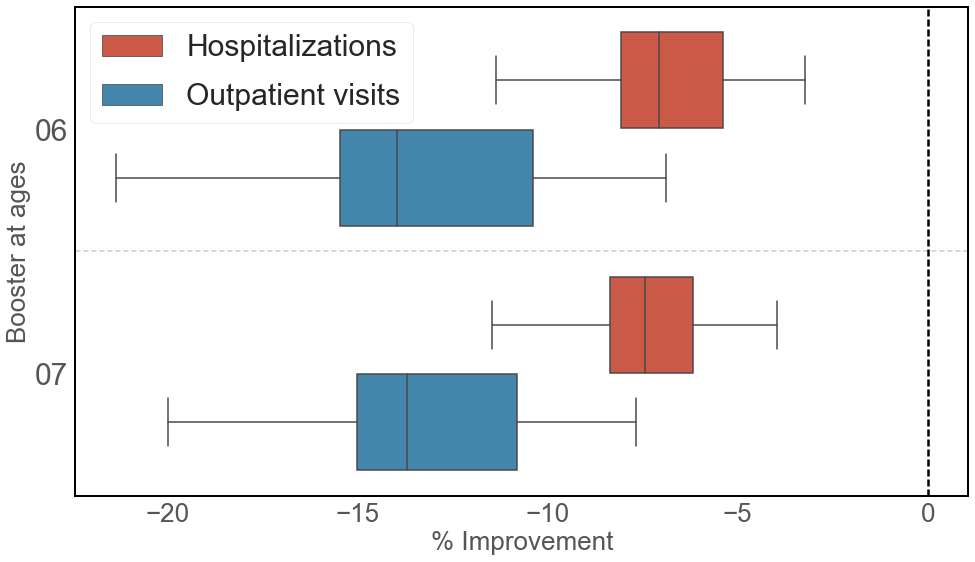

In [192]:
chosen_cols = remove_cols + shift_cols
chosen_cols = ['06','07']
# chosen_cols = ['06,13', '05,07','04,06']#,'default']#,'h']
dfa = pd.melt(df_sick[cover>0.0], value_vars = chosen_cols, var_name="Policy")
dfb = pd.melt(df_hospital[cover>0.0], value_vars = chosen_cols, var_name="Policy")
dfa['h'] = 'Outpatient visits'
dfb['h'] = 'Hospitalizations'

fig, ax = plt.subplots(figsize=(16,9))
# sns.boxplot(data = pd.concat((dfb,dfa)), hue='h', y='Policy', x='value', orient='h', ax=ax, whis=1)
sns.boxplot(data = pd.concat((dfb,dfa)), hue='h', y='Policy', x='value', orient='h', ax=ax, whis=1.5,showfliers=False, linewidth=1.5)
leg = ax.get_legend()
leg.set_title('')
print(leg.get_title())
ax.set_ylabel("Booster at ages")
ax.set_xlabel("% Improvement")
ax.vlines(0,*ax.get_ylim(),linestyles='--',zorder=0)
lims = ax.get_xlim()
ax.hlines(np.arange(len(chosen_cols)) + .5,*lims,linestyles='--',zorder=0,lw=0.3)
ax.set_xlim(*lims)
# plt.boxplot()

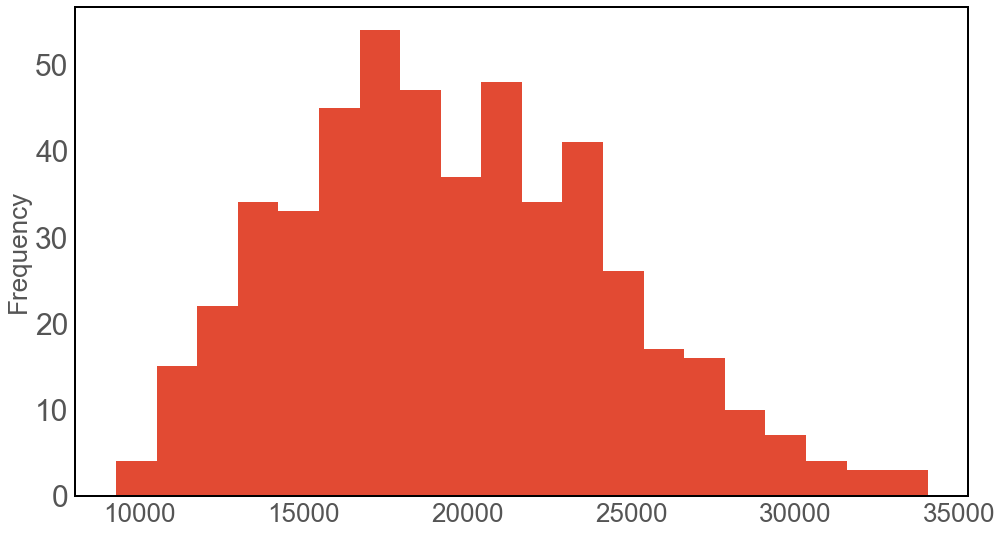

In [184]:
fig, ax = plt.subplots(figsize=(16,9))
df_sick_1y.add(100, axis =0).mul(basec/12, axis =0)['06'].plot.hist(bins=20)

In [55]:
# # Take only 99%
# font_title = {"fontsize":24}
# df_sick['h'] = 'sick' 
# df_hospital['h'] = 'hospital'
# chosen_cols = ['SHIFT_05_13', 'SHIFT_05_07','SHIFT_04_06']#,'h']
# # chosen_cols = ['05,13', '05,07','04,06']#,'h']
# fig, axs = plt.subplots(1,2,figsize=(20,9))

# df_sick['h'] = 1 
# df_hospital['h'] = 0
# # df_draw = pd.concat((df_sick[chosen_cols][cover>.25], df_hospital[chosen_cols][cover>.25]))
# policy_comparison(df_sick[chosen_cols][cover>.55], colors, ax=axs[0])
# # axs[0,0].set_title("Cases difference per year over 12 years", fontdict=font_title)
# policy_comparison(df_hospital[chosen_cols][cover>.55], colors, ax=axs[1])
# # axs[0,1].set_title("Hospitalized cases difference per year over 12 years", fontdict=font_title)
# # sns.boxplot(data=df_draw, ax=ax)
# # policy_comparison(df_sick[add_cols][cover>.25]/12, colors, ax=axs[1,0])
# # # axs[1,0].set_title("Cases difference per year over 12 years", fontdict=font_title)
# # policy_comparison(df_hospital[add_cols][cover>.25]/12, colors, ax=axs[1,1])
# # # axs[1,1].set_title("Hospitalized cases difference per year over 12 years", fontdict=font_title)
# plt.show()

C:\Program Files\Anaconda3\lib\site-packages\seaborn\categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


(-22.578660054099792, 4.1981864536227258)

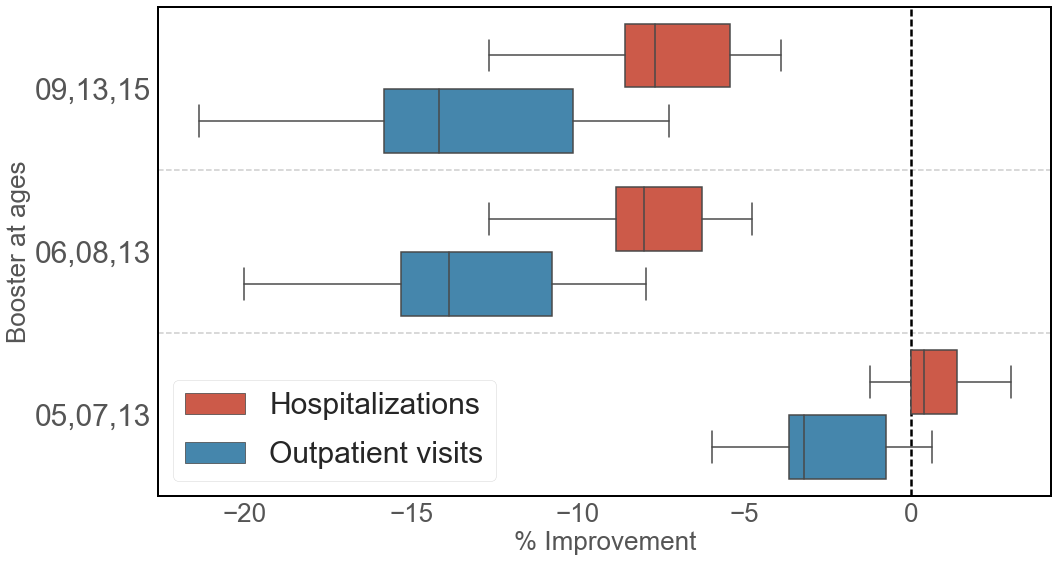

In [166]:
# chosen_cols = add_cols
# chosen_cols = ['09,13,15', '06,13,08', '05,13,07', '05,13,08']
# named__cols = ['09,13,15', '06,08,13', '05,07,13', '05,08,13']
# chosen_cols = ['05,13,06', '06,13,05']
dfa = pd.melt(df_sick[cover>0.55], value_vars = chosen_cols, var_name="Policy")
dfb = pd.melt(df_hospital[cover>0.55], value_vars = chosen_cols, var_name="Policy")
dfa['h'] = 'Outpatient visits'
dfb['h'] = 'Hospitalizations'

fig, ax = plt.subplots(figsize=(16,9))
# sns.boxplot(data = pd.concat((dfb,dfa)), hue='h', y='Policy', x='value', orient='h', ax=ax)
boxplot = sns.boxplot(data = pd.concat((dfb,dfa)), hue='h', y='Policy', x='value', orient='h', ax=ax, whis=1.5,showfliers=False, linewidth=1.5)
leg = ax.get_legend()
leg.set_title('')
ax.set_ylabel("Booster at ages")
ax.set_xlabel("% Improvement")
ax.vlines(0,*ax.get_ylim(),linestyles='--',zorder=0)
ax.set_yticklabels(named__cols)
lims = ax.get_xlim()
ax.hlines(np.arange(len(chosen_cols)) + .5,*lims,linestyles='--',zorder=0,lw=0.3)
ax.set_xlim(*lims)

C:\Program Files\Anaconda3\lib\site-packages\seaborn\categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


Text(0,0,'')


(-30.461140852054513, 5.0751696407141758)

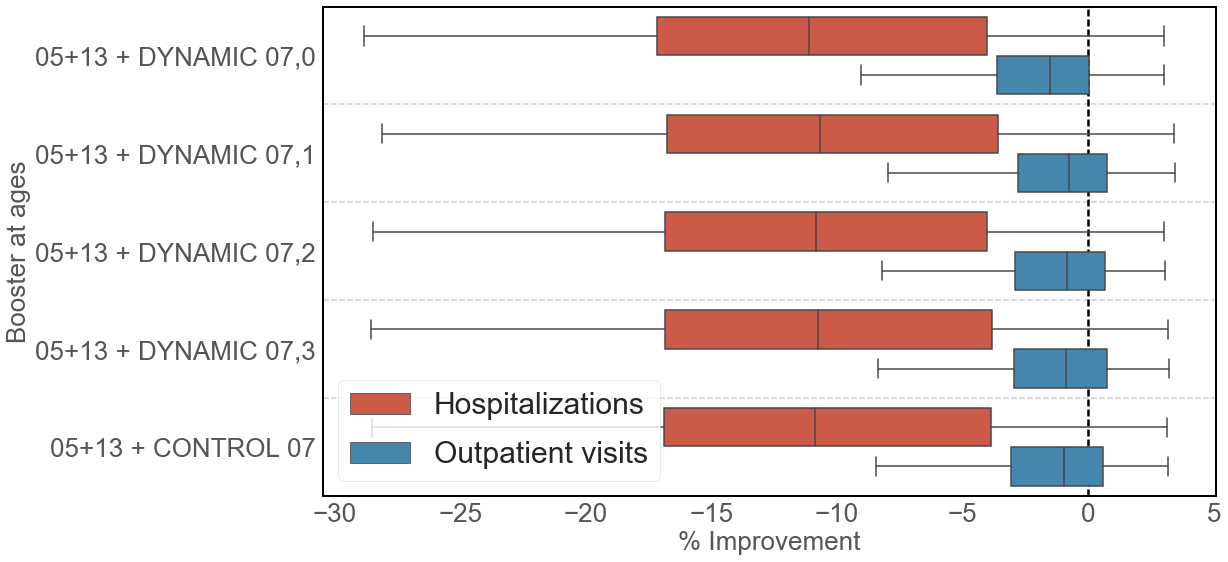

In [15]:
chosen_cols = dynamic_cols + control_cols
# chosen_cols = ['06,13', '05,07','04,06']#,'default']#,'h']
dfa = pd.melt(df_sick[cover>0.0], value_vars = chosen_cols, var_name="Policy")
dfb = pd.melt(df_hospital[cover>0.0], value_vars = chosen_cols, var_name="Policy")
dfa['h'] = 'Outpatient visits'
dfb['h'] = 'Hospitalizations'

fig, ax = plt.subplots(figsize=(16,9))
# sns.boxplot(data = pd.concat((dfb,dfa)), hue='h', y='Policy', x='value', orient='h', ax=ax, whis=1)
sns.boxplot(data = pd.concat((dfb,dfa)), hue='h', y='Policy', x='value', orient='h', ax=ax, whis=1.5,showfliers=False, linewidth=1.5)
leg = ax.get_legend()
leg.set_title('')
print(leg.get_title())
ax.set_ylabel("Booster at ages")
ax.set_xlabel("% Improvement")
ax.vlines(0,*ax.get_ylim(),linestyles='--',zorder=0)
lims = ax.get_xlim()
ax.hlines(np.arange(len(chosen_cols)) + .5,*lims,linestyles='--',zorder=0,lw=0.3)
ax.set_xlim(*lims)
# plt.boxplot()

### Per Dose

99.9503377881
[  83.629   101.1717  113.3203]


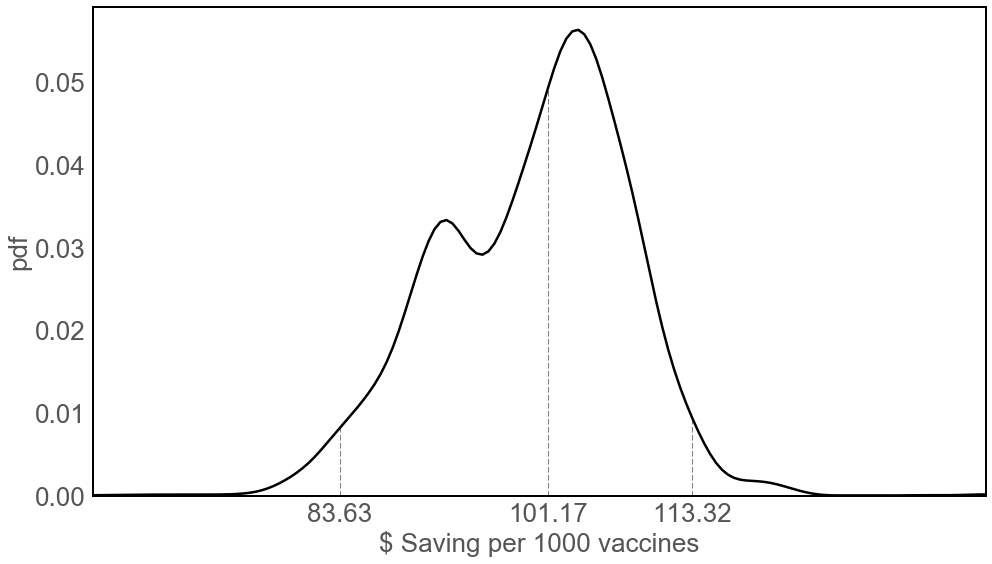

In [4]:
plt.style.use('dean_style.conf')
base = [p for p in policies if p['name'] == '06,13'][0]
additional = [p for p in policies if p['name'] == '05,13,08'][0]
base_s = np.array(base['sick']).sum(axis=1)
additional_s = np.array(additional['sick']).sum(axis=1)
base_h = np.array(base['hospital']).sum(axis=1)
additional_h = np.array(additional['hospital']).sum(axis=1)
base_v = np.array(base['vaccines']).sum(axis=1)
additional_v = np.array(additional['vaccines']).sum(axis=1)

# FORMULA
price = 605 * (base_h - additional_h) + 76.15 * (base_s - additional_s)
#####################################

# Per Dose
# per_dose = 1000 * (-additional_h + base_h) / (additional_v - base_v)
per_dose = 1000 * price / (additional_v - base_v)
# Plot
per_dose_mean = per_dose.mean()
print(per_dose_mean)
# print((per_dose<0).mean())
density  = kde(per_dose)
xs = np.linspace(per_dose.min(), per_dose.max(), 150)
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(xs, density(xs), color='k')
# ax.set_title("Per dose distribution",fontdict=font_title)
# ax.vlines(per_dose_mean,0,density(per_dose_mean),linestyle='--',lw=0.5)
qs = mquantiles(per_dose, [0.025,.5,0.975])
ax.vlines(qs,0,density(qs),linestyle='--',lw=0.5)
ax.set_xlabel("$ Saving per 1000 vaccines")
ax.set_ylabel("pdf")
print (qs)
ax.set_xticks(np.hstack((np.array(qs))))#,np.array(per_dose_mean))))
ax.set_ylim(bottom=0)
ax.set_xlim(per_dose.min(), per_dose.max())
plt.show()

### Dynamic Policy

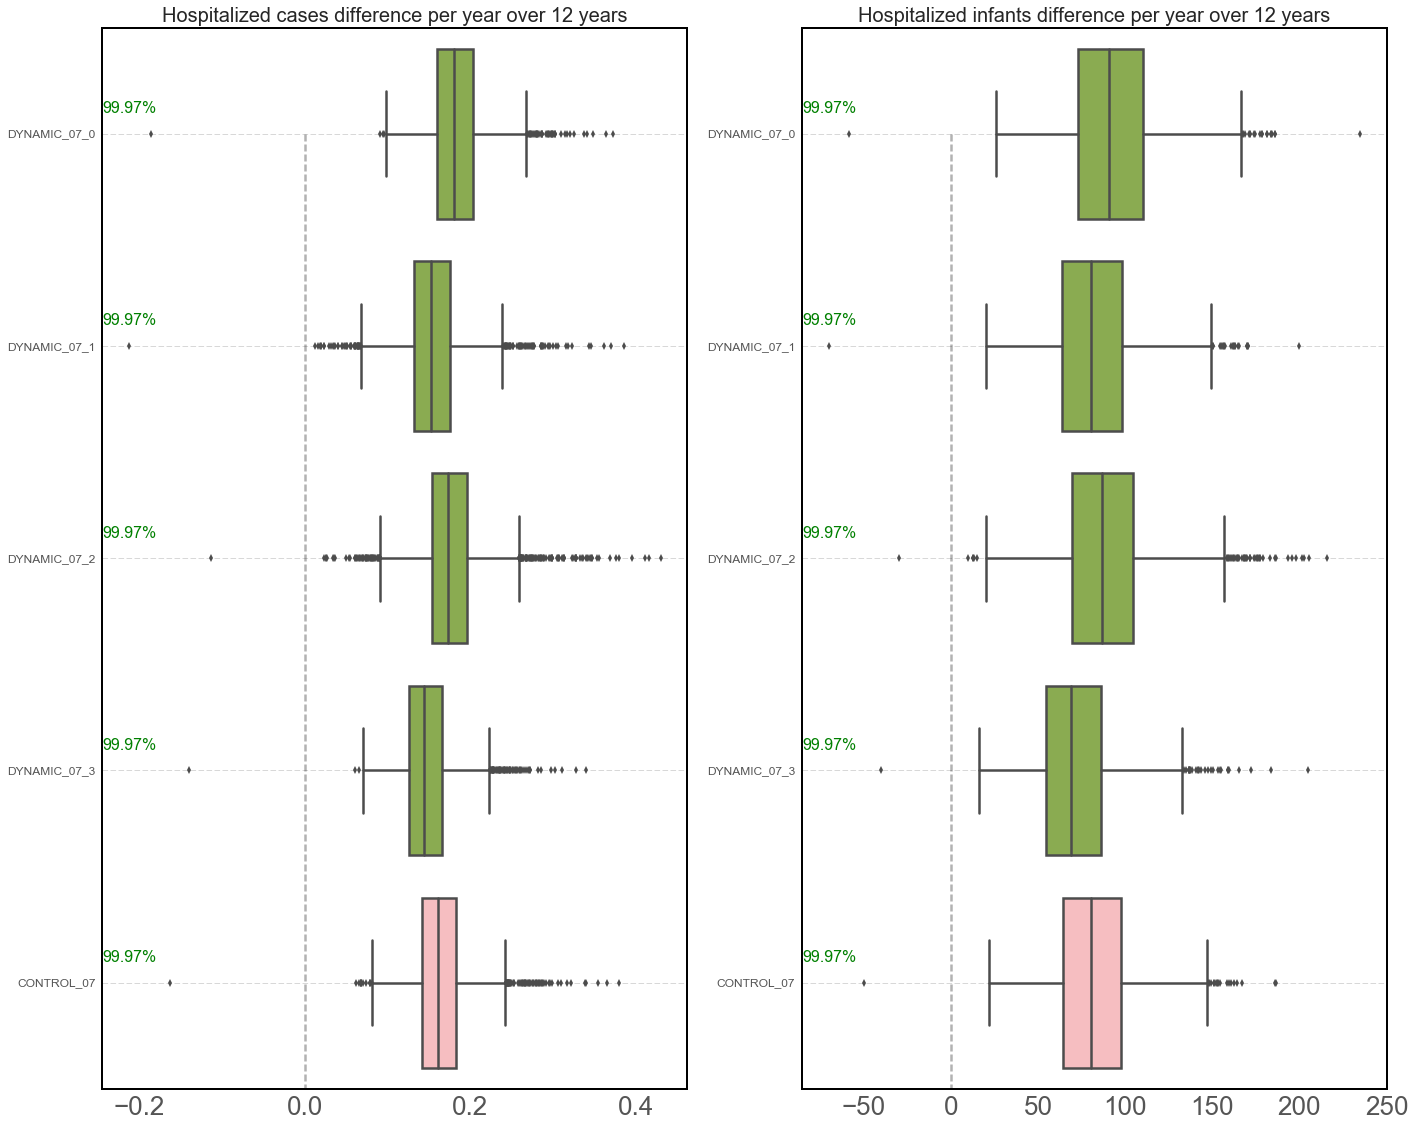

In [62]:
cols = []
# cols += remove_cols
# cols += shift_cols
# cols += add_cols
cols += dynamic_cols
cols += control_cols
fig, axs = plt.subplots(1,2, figsize=(20,16))
policy_comparison(df_hospital[cover>.25][cols]/12, colors, ax=axs[0])
axs[0].set_title("Hospitalized cases difference per year over 12 years")
policy_comparison(df_hospital_1y[cover>.25][cols]/12, colors, ax=axs[1])
axs[1].set_title("Hospitalized infants difference per year over 12 years")
try:
    policy_comparison(df_hospital_1y[cover<.20][cols]/12, colors, ax=axs[2])
    axs[2].set_title("Hospitalized infants difference per year over 12 years")
except: pass
plt.show()

In [670]:
ax.get_xticks()[::2]

array([ 1.,  2.,  3.,  4.,  5.])

In [675]:
np.hstack((ax.get_xticks()[::2],np.array(qs),np.array(per_dose_mean)))

array([ 1.        ,  2.        ,  3.        ,  4.        ,  5.        ,  1.75663504,  3.49321468,  2.53469519])

## Correlations

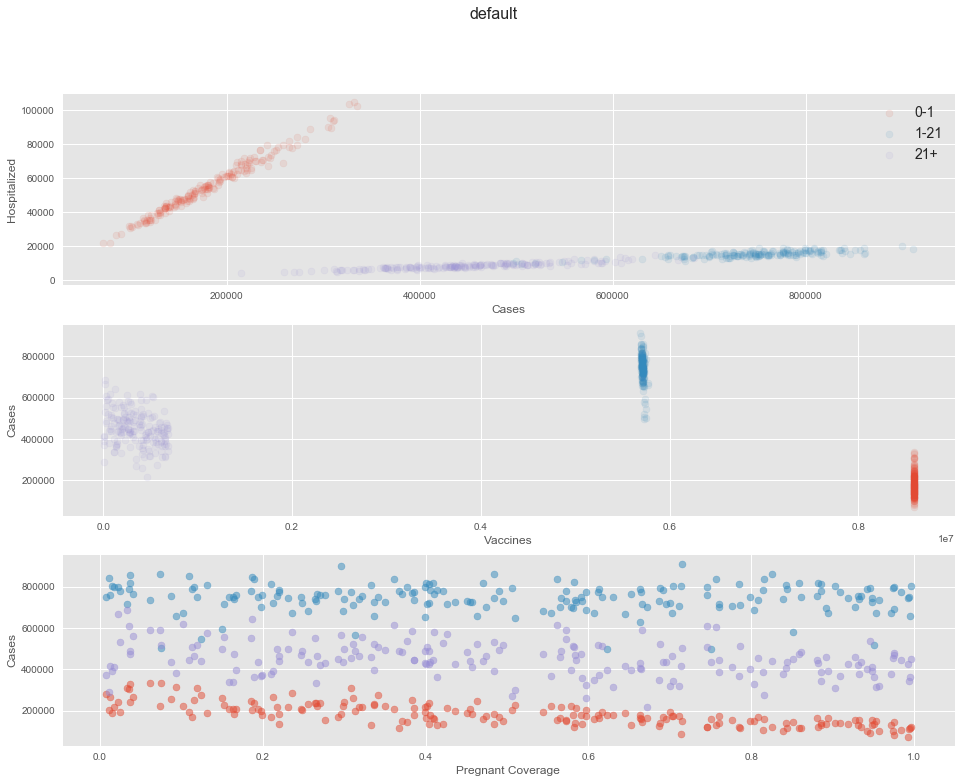

In [24]:
fig, ax = plt.subplots(3,figsize=(16,12))
policy = policies[0]
fig.suptitle(policy['name'], fontsize = 16)   
for i in range(3):
    ax[0].scatter(np.array(policy['sick'])[:,i], np.array(policy['hospital'])[:,i], label=age_names[i], alpha=0.1)
    ax[1].scatter(np.array(policy['vaccines'])[:,i], np.array(policy['sick'])[:,i], label=age_names[i], alpha=0.1)
    ax[2].scatter(simulation['pregnant_coverage'], np.array(policy['sick'])[:,i], label=age_names[i], alpha=0.5)
ax[0].set_xlabel('Cases')
ax[0].set_ylabel('Hospitalized')
ax[1].set_xlabel('Vaccines')
ax[1].set_ylabel('Cases')
ax[2].set_xlabel('Pregnant Coverage')
ax[2].set_ylabel('Cases')
                        
ax[0].legend(fontsize=14)
plt.show()

## Histogram

TypeError: string indices must be integers

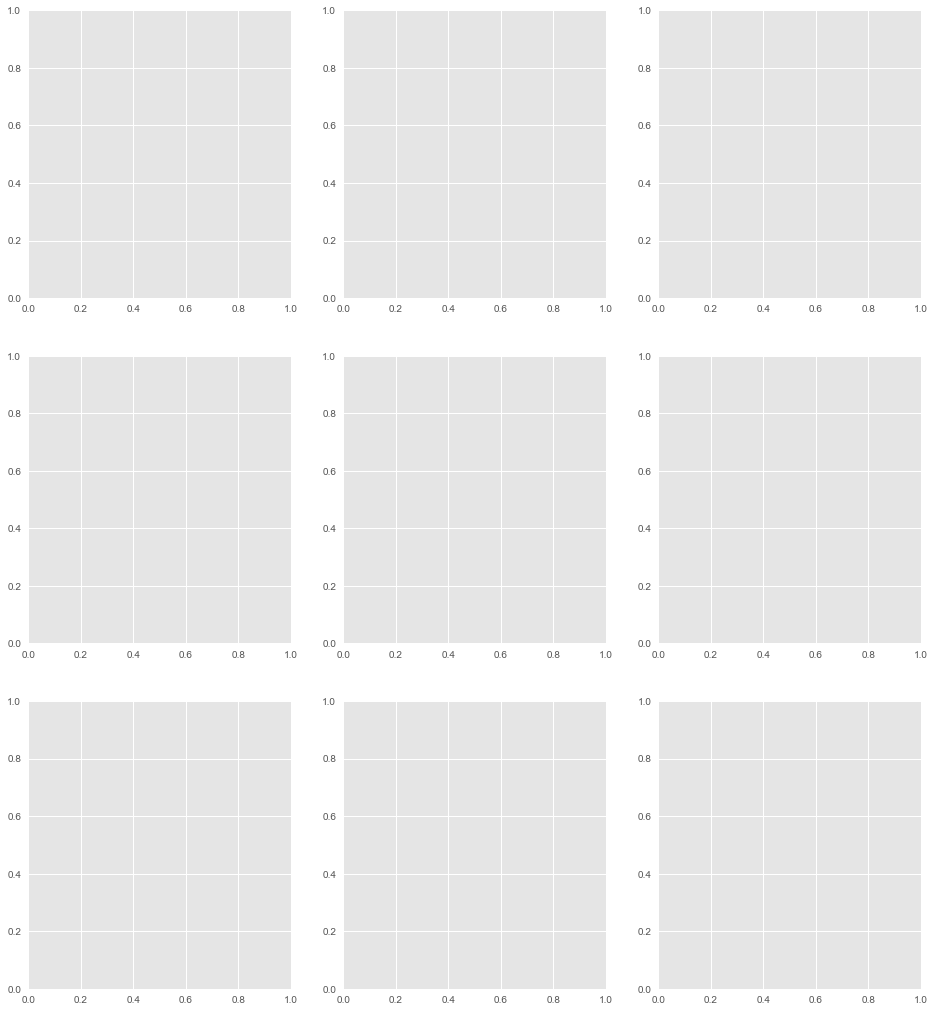

In [38]:
fig, axs = plt.subplots(3,3,figsize=(16,18))
policy = best_policiy
for i, metric in enumerate(metric_names): # i - i is ax row: result type
#     print me`
    for age in range(3): # j is age
        arr = np.array(policy[metric])[:,age]
        ax = axs[i,age]
        ax.hist(arr)
        m = ax.get_ylim()[1]
        ax.vlines(np.median(arr), 0, m)
        ax.set_title('{} {} {:.2f}'.format(metric,age_names[age], np.median(arr)))


# Predict

In [305]:
np.set_printoptions(edgeitems=10, linewidth=120, suppress=True, precision=8)

In [455]:
take_subsets(mcmc)

Effective sample size: [ 1431.51012568  1795.83358568  1326.0910086   1742.72817132]
[10000 19000 28000]
Subset length: 3


In [481]:
predict_soon(simulation, r=12)

L 3



In [702]:
more = 48
subset_chain = mcmc['chain_subset']
subset_states = mcmc['state_z_subset']
l = len(subset_chain)
pick = 1
# state_0 = subset_states[pick, :]
# state_0 = np.split(state_0, 10)
params = mcmc['initial_guess'].copy()
params[mcmc['active_params']] = subset_chain[pick, :]
# params[2] = 1
print (params)
print(subset_chain[pick, :])
print(mcmc['chain'][mcmc['picks'][pick], :])
om, phi, rho, f1, f2, f3 = params
z = test_model(mcmc['state_0'], mcmc['start'], mcmc['end'] + more, *params ,e=1, r=3, r_0=40,years_prior=10)[0]

[  3.9805       2.10470189  70.           0.00077051   0.00019133   0.00004795]
[ 2.10470189  0.00077051  0.00019133  0.00004795]
[ 2.10470189  0.00077051  0.00019133  0.00004795]
[  1.26654058e+08   1.26510227e+08   1.25966183e+08   1.25523091e+08   1.25024246e+08   1.24574698e+08   7.37566410e+08
   7.26273077e+08   7.14495693e+08   7.03504373e+08   6.90006174e+08   6.79113160e+08   6.68453624e+08   6.72525423e+08
   6.48692076e+08   6.37735721e+08   6.27901811e+08   6.18309494e+08   1.20188990e+09   1.76204966e+09   1.64894907e+09
   2.08320299e+09   4.60981169e+09   3.99596203e+09   3.39561825e+09   2.78185350e+09   4.40358366e+09]


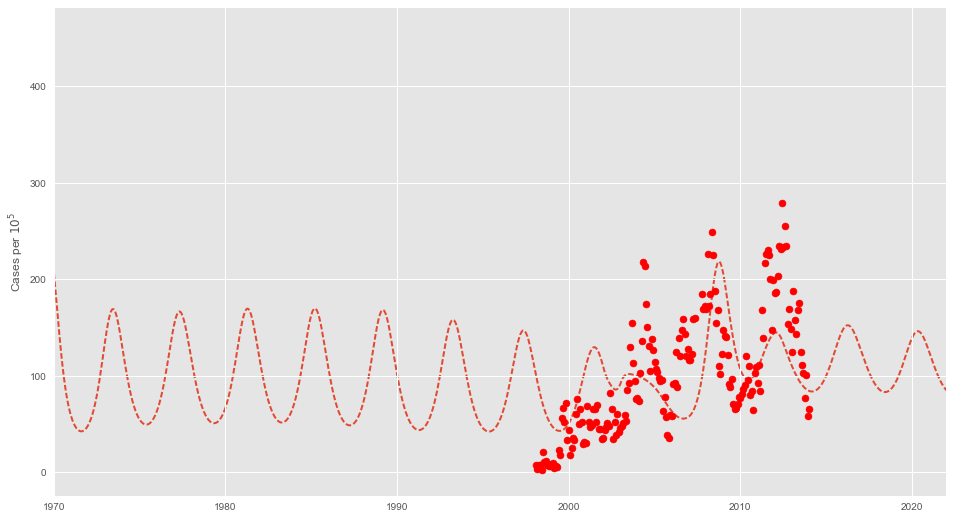

In [711]:
# more = 16
plot_data = mcmc['datax'].copy()
plot_data[mcmc['datax'] > 150] = np.nan
sampled = mcmc['y_hat_M'][mcmc['picks'],:,:].copy()
fig, axs = plt.subplots(1, figsize=(16, 9))
ax = axs
# for curr_model in sampled[:3]:

#     ax.plot(mcmc['datay'], curr_model.sum(axis=0), color='grey', alpha=0.93)
# for pred_model in mcmc['prediction']:
#     ax.plot(np.linspace(2014+1/12,2014+2*more,12*2*more), pred_model.sum(axis=0)[0:], color='grey', alpha=0.93)
ax.plot(np.linspace(1948+1/12,2014+more,len(z.sum(axis=0))), z.sum(axis=0),'--',zorder=0,lw=2)

ax.scatter(mcmc['datay'], plot_data.sum(axis=0), c='red', zorder=5)
ax.set_ylabel("Cases per $10^5$")
# ax.set_xlim(2013.9,2015)
ax.set_xlim(1970,2022)
# ax.set_ylim(bottom=0)
plt.show()

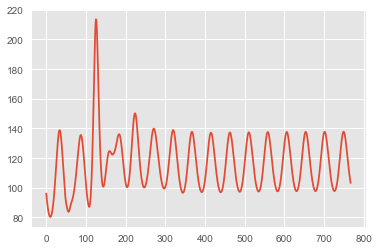

In [451]:
plt.plot(z.sum(axis=0))

In [701]:
def test_model(state_0, start, end,
              om, phi, rho, f1, f2, f3, e=1,
              r=3, r_0=20, years_prior=10):
    no_likelihood = -np.inf * np.ones((3, 192)), -np.inf * np.ones(270)
    # fix and set params
    f = np.concatenate((nums(f1, sc[0]), nums(f2, sc[1]), nums(f3, sc[2])))
    phi = phi % (2 * np.pi)
    # Run first few years on high resolution
    y_0 = difference_model(state_0, start - years_prior, start,
                           rho, om, phi, f, e,
                           r=r_0, full_output=True)
    if type(y_0) == str:
        logger.error('Model exited at WARM UP')
        return no_likelihood
    # Take Main state_0 as last state of initial years
    state_0 = [yi[:, -1] for yi in y_0]
    # Run model
    y = difference_model(state_0, start, end,
                         rho, om, phi, f, e,
                         r=r, full_output=True)
    if type(y) == str:
        print('Model exited at MAIN')
        return no_likelihood
    # If under 5 are not very 4/6 in the R comp. return no likelihood
    # Compute where the cut is
    tmp_cut = np.arange(int(r / N * (1953 - start)),
                        int(r / N * (1957 - start)))
    # Compute Total in the point, and R in the point - needed age is 5 (point 9)
    R, A = y[5], y[7]
#     return A, R
    print(A.sum(axis=1))
    tmp_R = R[9, tmp_cut]  # 9 is the needed age group
    tmp_A = A[9, tmp_cut]
    mean_sick = (tmp_R / tmp_A).mean()
    # exit()
    # Test condition
    if mean_sick <= 0.7:
        logger.error('Not enough sick kids, {:.2f}'.format(mean_sick))
        return no_likelihood
    # Save last state
    state_z = [yi[:, -1] for yi in y]
    state_z = np.concatenate(state_z)
    y = y[-1]  # NEW SICK is the last one
    # Take result and sum values according to susceptibility
    y = np.split(y, np.cumsum(sc)[:-1])
    y = [yi.sum(axis=0) for yi in y]
    y = [yi / A.sum(axis=0) for yi in y]
    # print((y[1]/A.sum(axis=0)).shape)
    y = [np.sum(yi.reshape(-1, r), axis=1) for yi in y]
    y = np.array(y) * 10 ** 5

    # Monthly
    # Slices relevant for months data
    start_ix = (1948 - start) * 12
    end_ix = (2014 + more - start) * 12
    monthly = y[:, start_ix:end_ix]
    
    return monthly, state_z


In [379]:
mcmc['end']

2014